**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#dropping customerid column as it is not required for modelling
df.drop('customerID',axis=1,inplace=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.nunique()

,0
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


In [ ]:
for col in df.columns:
  print(f'{col}: {df[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

In [ ]:
#df['TotalCharges'].astype(float)

In [ ]:
df[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
len(df[df['TotalCharges']==' '])

11

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace({' ':0.0})

In [ ]:
len(df[df['TotalCharges']==' '])

0

In [ ]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [ ]:
print(df.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [ ]:
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


# Insights


1.   Removing column CustmerId as it is not required for modelling
2.   Checked for missing values(none found)


1.   Missing values in the column TotalCharges were replaced by 0.0
2.   Class imbalance was found in the target





**Exploratory Data Analysis (EDA)**

In [ ]:
df.shape

(7043, 20)

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


**Numerical Features Analysis**

Understand the distribution of numerical features

In [ ]:
def plot_histogram(df,column_name):
  plt.figure(figsize=(6,4))
  sns.histplot(df[column_name],kde=True)
  plt.title(f"Histogram of {column_name}")
  plt.axvline(df[column_name].mean(),color='red',linestyle='--',label='Mean',linewidth=2)
  plt.axvline(df[column_name].median(),color='green',linestyle='-',label='Median',linewidth=2)
  plt.legend()
  plt.tight_layout(pad=3.0)
  plt.show()

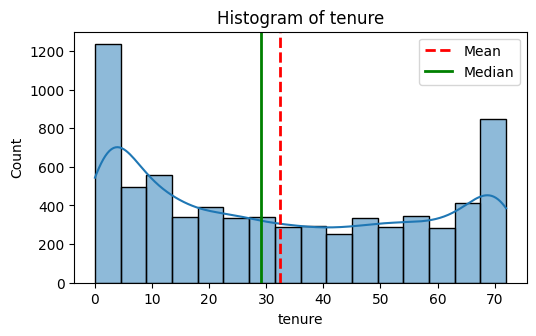

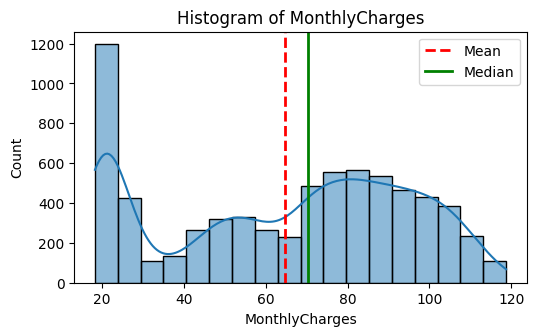

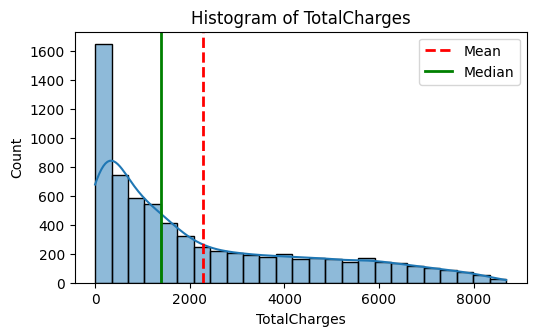

In [ ]:
numcols = ['tenure','MonthlyCharges','TotalCharges']
for col in numcols:
  plot_histogram(df,col)
  print("\n" * 3)

In [ ]:
# TotalCharges are right-skewed but we don't have to perform any feature scaling since we will be using tree classifiers

**Box plot for numerical features**

In [ ]:
def plot_box(df,column_name):
  plt.figure(figsize=(6,4))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box plot of {column_name}")
  plt.tight_layout(pad=3.0)
  plt.show()

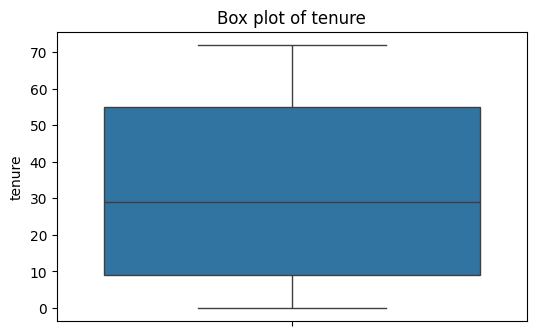

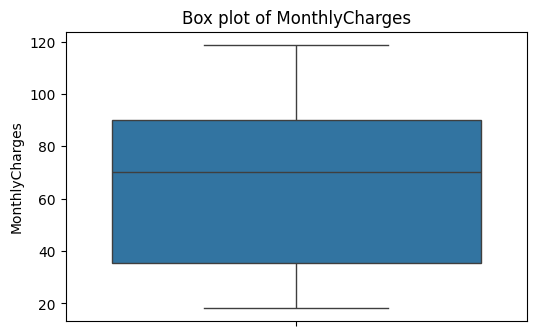

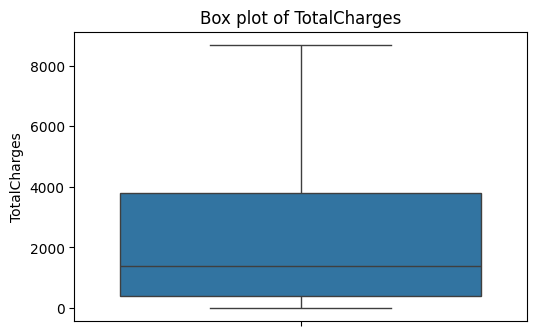

In [ ]:
numcols = ['tenure','MonthlyCharges','TotalCharges']
for col in numcols:
  plot_box(df,col)
  print("\n" * 3)

Correlation heatmap for numerical columns

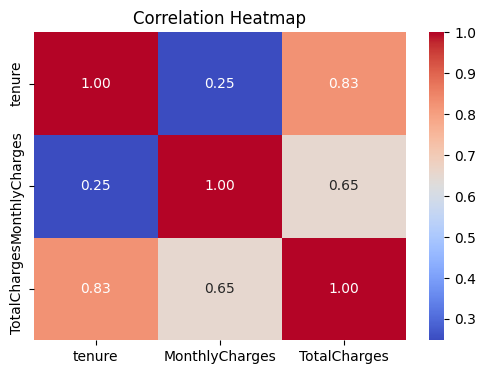

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Categorical Feature Analysis**

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Count plot for categorical features

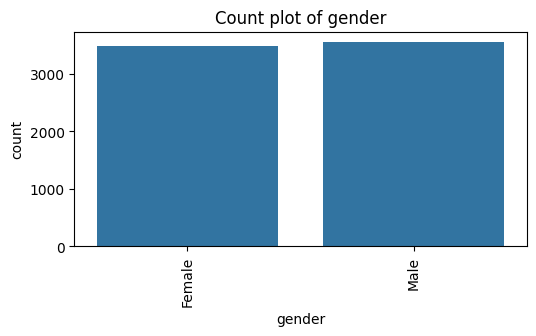

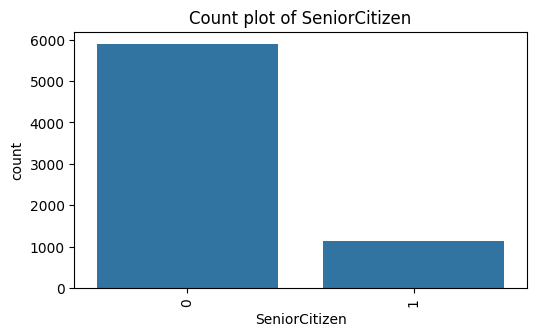

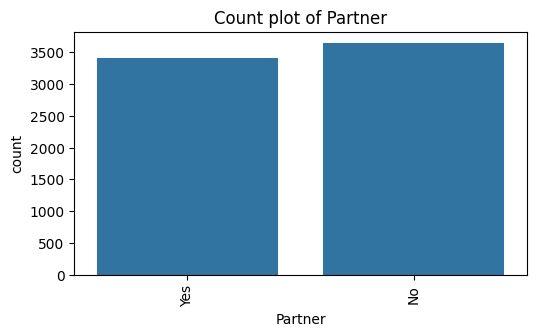

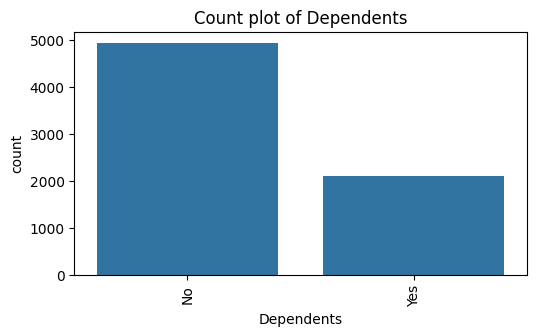

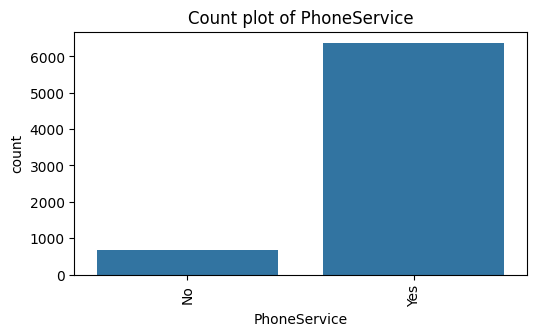

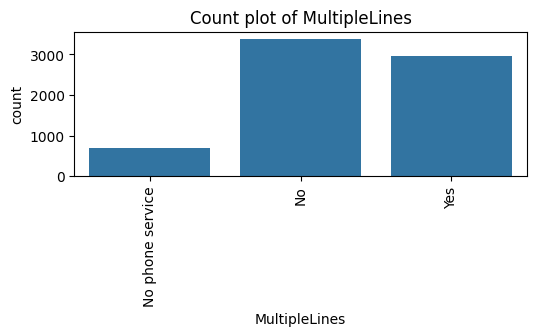

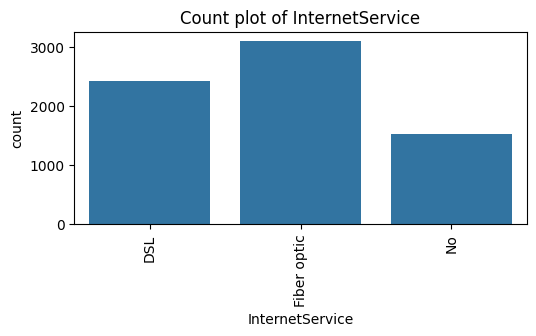

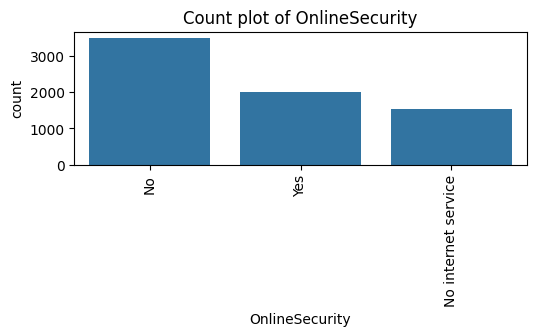

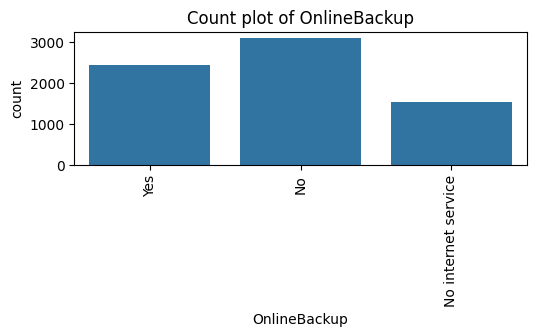

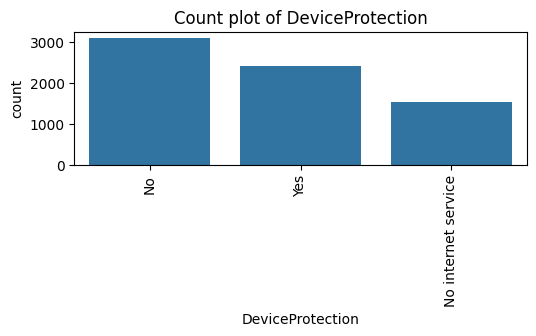

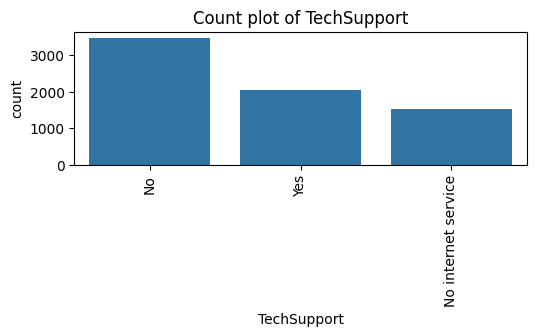

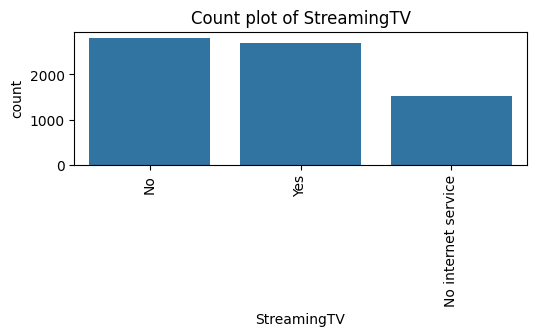

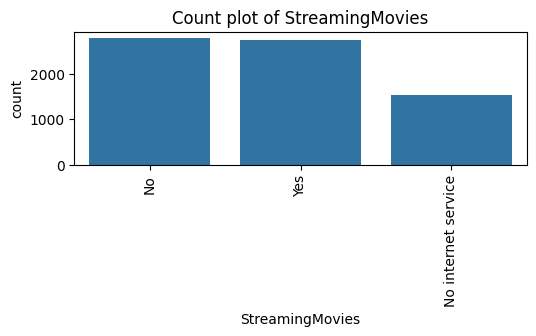

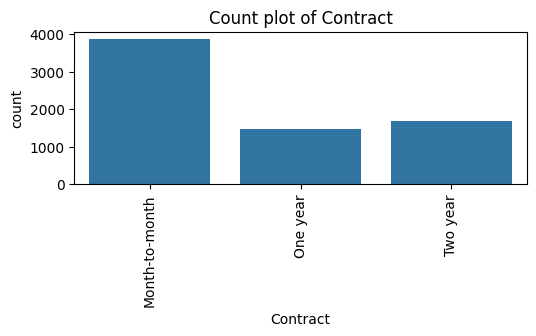

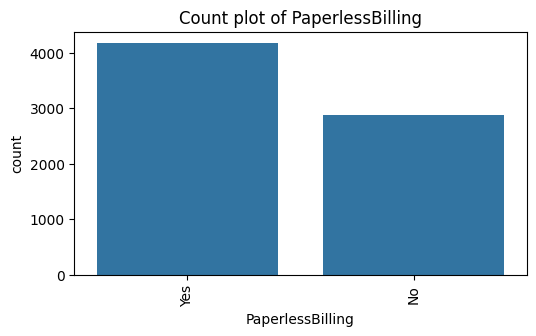

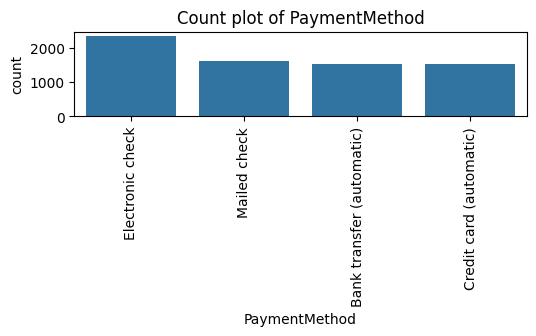

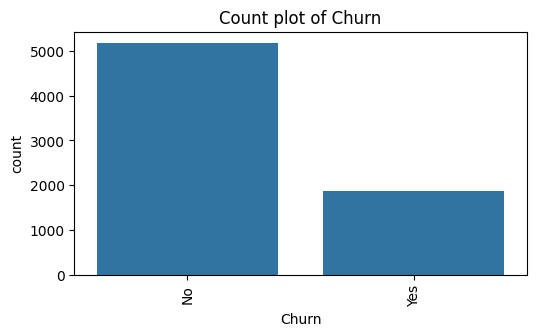

In [ ]:
for col in df.columns:
  if col not in numcols:
      plt.figure(figsize=(6,4))
      sns.countplot(x=df[col])
      plt.title(f"Count plot of {col}")
      plt.xticks(rotation=90)
      plt.tight_layout(pad=3.0)
      plt.show()



**Data Preprocessing**

In [ ]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})

In [ ]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


Label encoding of categorical features

In [ ]:
import pickle
label_encoders = {}

cat_cols = [col for col in df.columns if df[col].dtype == 'object']

# Encode categorical columns before splitting
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Save encoders for Streamlit app use
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Churn',axis=1),df['Churn'],test_size=0.2,random_state=42)

In [ ]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,0,1,21,1,0,0,2,0,2,0,0,2,1,0,3,64.85,1336.80
1623,0,0,0,0,54,1,2,1,0,2,0,0,2,2,2,1,0,97.20,5129.45
6074,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,23.45,23.45
1362,1,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,2,70.20,237.95
6754,1,0,0,1,0,1,2,0,2,2,0,2,0,0,2,1,0,61.90,0.00


In [ ]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,24.80,24.80
2715,1,0,0,0,41,1,2,2,1,1,1,1,1,1,0,1,0,25.25,996.45
3825,0,0,1,1,52,1,0,2,1,1,1,1,1,1,2,0,3,19.35,1031.70
1807,0,0,0,0,1,1,0,1,0,0,2,0,0,0,0,0,2,76.35,76.35
132,1,0,0,0,67,1,0,0,0,0,0,2,0,0,2,0,0,50.55,3260.10


In [ ]:
label_encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [ ]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
print(y_train_resampled.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


**Modelling**

In [ ]:
models_params = {
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [3, 5, 7, 10, None],
            "min_samples_split": [2, 5, 10],
            "criterion": ["gini", "entropy"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [5, 10, 15, None],
            "min_samples_split": [2, 5, 10]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(random_state=42, eval_metric='logloss'),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [3, 5, 7],
            "learning_rate": [0.01, 0.1, 0.2],
            "subsample": [0.8, 1.0]
        }
    }
}


In [ ]:
results = {}

# Step 3: Train and evaluate each model using GridSearchCV
for name, mp in models_params.items():
    print(f"\n Tuning {name}...")

    grid = GridSearchCV(
        estimator=mp["model"],
        param_grid=mp["params"],
        scoring='f1',
        cv=5,
        n_jobs=-1,
        verbose=1
    )

    grid.fit(X_train_resampled, y_train_resampled)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cv_scores = cross_val_score(best_model, X_train_resampled, y_train_resampled, cv=5, scoring='f1')

    results[name] = {
        "Best Params": grid.best_params_,
        "Accuracy": acc,
        "F1-Score": f1,
        "CV Mean F1": np.mean(cv_scores)
    }


 Tuning Decision Tree...
Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Tuning Random Forest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

 Tuning XGBoost...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [ ]:
print(f"\n {name} Results:")
print("Best Params:", grid.best_params_)
print("CV Mean F1:", round(np.mean(cv_scores), 4))
print("Test Accuracy:", round(acc, 4))
print("Test F1 Score:", round(f1, 4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


 XGBoost Results:
Best Params: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
CV Mean F1: 0.8256
Test Accuracy: 0.7771
Test F1 Score: 0.6297
Confusion Matrix:
 [[828 208]
 [106 267]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84      1036
           1       0.56      0.72      0.63       373

    accuracy                           0.78      1409
   macro avg       0.72      0.76      0.74      1409
weighted avg       0.80      0.78      0.78      1409



In [ ]:
best_model_name = max(results, key=lambda x: results[x]["F1-Score"])
print("\n Best Overall Model:", best_model_name)
print("Metrics:", results[best_model_name])


 Best Overall Model: XGBoost
Metrics: {'Best Params': {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}, 'Accuracy': 0.7771469127040455, 'F1-Score': 0.6297169811320755, 'CV Mean F1': np.float64(0.8255616041492102)}


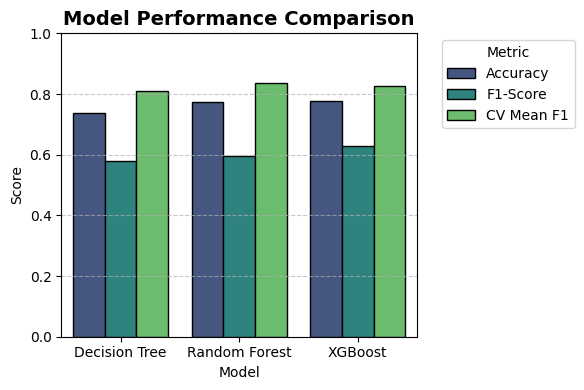

In [ ]:
results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})

# Round values for better readability
results_df["Accuracy"] = results_df["Accuracy"].round(3)
results_df["F1-Score"] = results_df["F1-Score"].round(3)
results_df["CV Mean F1"] = results_df["CV Mean F1"].round(3)



# --- Plot 1: Accuracy, F1-Score, CV Mean F1 comparison ---
plt.figure(figsize=(6,4))
sns.barplot(x='Model', y='value', hue='variable',
            data=pd.melt(results_df, id_vars='Model',
                         value_vars=['Accuracy', 'F1-Score', 'CV Mean F1']),
            palette='viridis', edgecolor='black')

plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

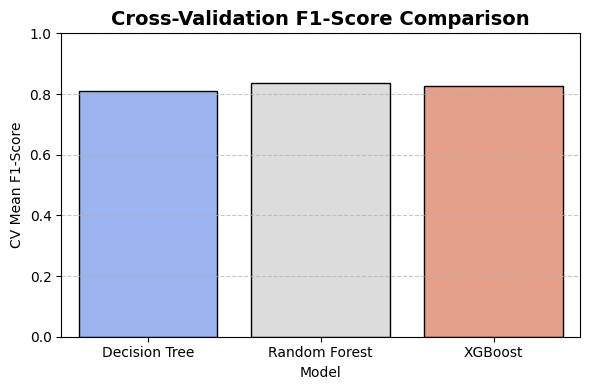

In [ ]:
# --- Plot 2: Cross-validation F1 Scores only ---
plt.figure(figsize=(6,4))
sns.barplot(x='Model', y='CV Mean F1', data=results_df, hue='Model',palette='coolwarm', edgecolor='black',legend=False)
plt.title('Cross-Validation F1-Score Comparison', fontsize=14, fontweight='bold')
plt.ylabel('CV Mean F1-Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


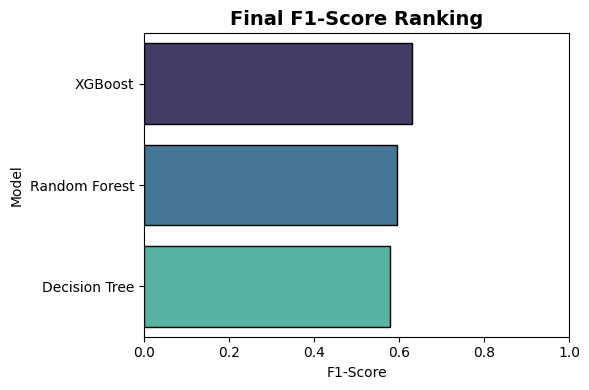

In [ ]:
results_df_sorted = results_df.sort_values(by='F1-Score', ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x='F1-Score', y='Model', data=results_df_sorted, hue='Model',palette='mako', edgecolor='black')
plt.title('Final F1-Score Ranking', fontsize=14, fontweight='bold')
plt.xlabel('F1-Score')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

**Model Evaluation**

In [ ]:
model = XGBClassifier(
    random_state=42,
    n_estimators=200,
    max_depth=7,
    learning_rate=0.01,
    subsample=0.8,
    eval_metric='logloss'
)

# Train on SMOTE-balanced training data
model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[828 208]
 [106 267]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84      1036
           1       0.56      0.72      0.63       373

    accuracy                           0.78      1409
   macro avg       0.72      0.76      0.74      1409
weighted avg       0.80      0.78      0.78      1409



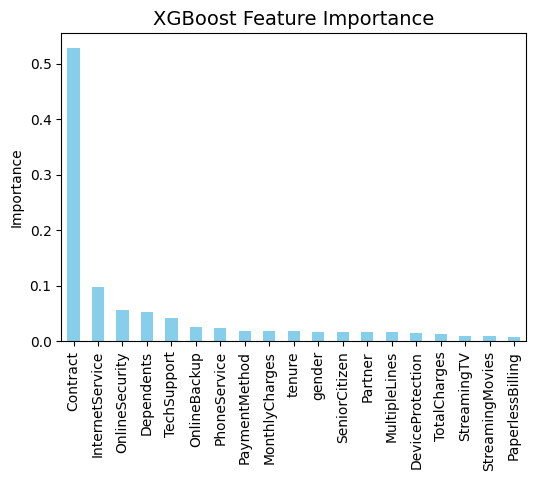

In [ ]:
feature_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(6,4))
feature_importances.plot(kind='bar', color='skyblue')
plt.title('XGBoost Feature Importance', fontsize=14)
plt.ylabel('Importance')
plt.show()

In [ ]:
with open('model_xgboost.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# --- Load model and encoders ---
with open('model_xgboost.pkl', 'rb') as f:
    model = pickle.load(f)

with open('label_encoders.pkl', 'rb') as f:
    label_encoders = pickle.load(f)

# --- Prediction function ---
def predict_churn(new_data: pd.DataFrame, model, label_encoders, numeric_cols=None, drop_cols=None):

    new_df = new_data.copy()

    # Drop unnecessary columns
    if drop_cols:
        new_df = new_df.drop(columns=[col for col in drop_cols if col in new_df.columns], errors='ignore')

    # Apply label encoders safely
    for col, le in label_encoders.items():
        if col in new_df.columns:

            new_df[col] = new_df[col].apply(lambda x: x if x in le.classes_ else 'Unknown')
            if 'Unknown' not in le.classes_:
                le.classes_ = np.append(le.classes_, 'Unknown')
            new_df[col] = le.transform(new_df[col])


    if numeric_cols:
        for col in numeric_cols:
            if col in new_df.columns:
                new_df[col] = new_df[col].astype(float)

    # Predict
    pred = model.predict(new_df)
    pred_proba = model.predict_proba(new_df)[:,1]


    result_df = new_data.copy()
    result_df['Churn_Prediction'] = ['Yes' if x==1 else 'No' for x in pred]
    result_df['Churn_Probability'] = np.round(pred_proba, 2)

    return result_df

# --- Example usage ---
new_customer_data = pd.DataFrame({
    'customerID': ['7590-VHVEJ'],
    'gender': ['Male'],
    'SeniorCitizen': [0],
    'Partner': ['Yes'],
    'Dependents': ['No'],
    'tenure': [1],
    'PhoneService': ['Yes'],
    'MultipleLines': ['No phone service'],
    'InternetService': ['DSL'],
    'OnlineSecurity': ['No'],
    'OnlineBackup': ['No'],
    'DeviceProtection': ['No'],
    'TechSupport': ['No'],
    'StreamingTV': ['No'],
    'StreamingMovies': ['No'],
    'Contract': ['Month-to-month'],
    'PaperlessBilling': ['Yes'],
    'PaymentMethod': ['Electronic check'],
    'MonthlyCharges': [29.85],
    'TotalCharges': [29.85],
    'Churn': ['No']
})

numeric_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
drop_cols = ['customerID', 'Churn']

predicted = predict_churn(new_customer_data, model, label_encoders, numeric_cols=numeric_cols, drop_cols=drop_cols)
print(predicted)


   customerID gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEJ   Male              0     Yes         No       1          Yes   

      MultipleLines InternetService OnlineSecurity  ... StreamingTV  \
0  No phone service             DSL             No  ...          No   

  StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
0              No  Month-to-month              Yes  Electronic check   

  MonthlyCharges TotalCharges Churn  Churn_Prediction  Churn_Probability  
0          29.85        29.85    No               Yes               0.77  

[1 rows x 23 columns]
